# Convolutional Neural Networks

### Images properties

- They are high-dimensional.

    - A typical image for a classification task contains 224×224 RGB values (i.e., 150,528 input dimensions)
      
    - With fully connected networks, this poses obvious practical problems in terms of the required training data, memory, and computation. 

- Local pattern: nearby image pixels are statistically related.

    - spatial relations between local patterns are informative
    
    - fully connected networks have no notion of “nearby” and treat the relationship between every input equally


- The interpretation of an image is stable under geometric transformations.



## Basic components of convolutional neural networks (CNN)

CNNs consist of an __input, hidden layers, and an output layer__, just like normal neural networks. __The hidden layer__ are commonly formed by __convolutional layers, pooling layers (layers that reduce the spatial size of the input), and fully-connected layers__

<img src="fig/convnet.png" width=600 height=600 />

__Convolutional layers__ process each __local image__ region independently, __using parameters shared across the whole image__. They use fewer parameters than fully connected layers, exploit the spatial relationships between nearby pixels, and don’t have to re-learn the interpretation of the pixels at every position.

Convolutional layers consist of __a set of filters of fixed size__, which are matrices with certain __values/weights__, that are applied all over the input, by computing the scalar product between the filters and the input, which is called convolution.

Each of these filters produces a two-dimensional __activation map__.

The sizes of the filters of convolutional layers often go from 2x2 to 7x7, for example, depending on whether you are at the beginning of the network (higher sizes) or toward the end (smaller sizes).

__pooling layer__: After performing convolution, and before another convolution is applied, a __pooling layer__ is normally applied in order to reduce the size of the input so that the network can get a deeper understanding of the image.

There is a tendency to avoid max pooling and instead encourage strides, which are naturally applied when performing convolution.

__Strides__: This is the length, defined in pixels, for the steps of the filter being applied over the entire image. 

### Convolutional networks for 1D inputs

<img src="fig/1dConv.png" width=500 height=500 />

### Convolutional networks for 2D inputs

<img src="fig/2dConv.png" width=500 height=500 />

### Invariance and equivariance

<img src="fig/inv.png" width=500 height=500 />

**Invariance** 

A function $f[x]$ of an image $x$ is invariant to a transformation $t[x]$ if:  

    - f[t[x]] = f[x]

the output of the function f[x] is the same regardless of the transformation t[x].

- Networks for image classification should be invariant to geometric transformations of the image (figure a–b)
- The network f[x] should identify an image as containing the same object, even if it has been translated, rotated, flipped, or warped

**Equivariance**

A function f[x] of an image x is equivariant or covariant to a transformation t[x] if: 
    
    - f[t[x]] = t[f[x]].

f[x] is equivariant to the transformation t[x] if its output changes in the same way under the transformation as the input

- Networks for per-pixel image segmentation should be equivariant to transformations (figure 1c–f)
- if the image is translated, rotated, or flipped, the network f[x] should return a segmentation that has been transformed in the same way.

### Convolutional networks properties

- *The patterns they learn are translation-invariant.* After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected model would have to learn the pattern anew if it appeared at a new location.

- This makes convnets data-efficient when processing images (because the visual world is fundamentally translation-invariant): they need fewer training samples to learn representations that have generalization power.

- *They can learn spatial hierarchies of patterns.* A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts, because the visual world is fundamentally spatially hierarchical.

Convolutions operate over rank-3 tensors called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis).

Convolutions are defined by two key parameters:
- Size of the patches extracted from the inputs—These are typically 3 × 3 or 5 × 5.
  
- Depth of the output feature map—This is the number of filters computed by the con- volution.

### Downsampling

The reason to use __downsampling__ (pooling and stride) is to __reduce the number of feature-map coefficients to process__, as well as __to induce spatial-filter hierarchies by making successive convolution layers look at increasingly large windows__ (in terms of the fraction of the original input they cover).

## Convolutional networks and receptive fields

convolutional networks comprise a sequence of convolutional layers. The receptive field of a neuron in the network is the region of the original input that feeds into it.

- Neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields.
  
- In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.

- This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

<img src="fig/pfield.png" width=400 height=400 />

## Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [2]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [3]:
three = Xtrain[7, :].reshape(28, 28)

In [4]:
three.shape

(28, 28)

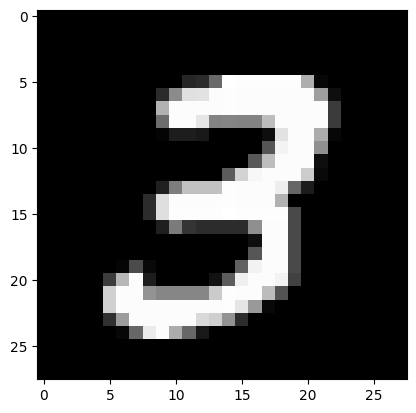

In [5]:
plt.imshow(three, cmap='gray')

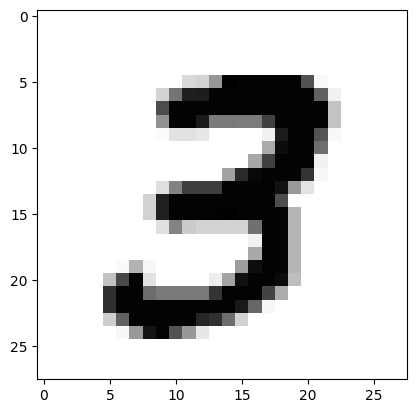

In [6]:
plt.imshow(-three, cmap='gray')

In [7]:
def draw_image(image, label):
    plt.imshow(-image, cmap='gray',vmin=-1, vmax=0)
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

In [8]:
patches = []
for row in range(0, 28, 7):
    for col in range(0, 28, 7):
        patches.append(three[row:row + 7, col:col + 7])
len(patches)

16

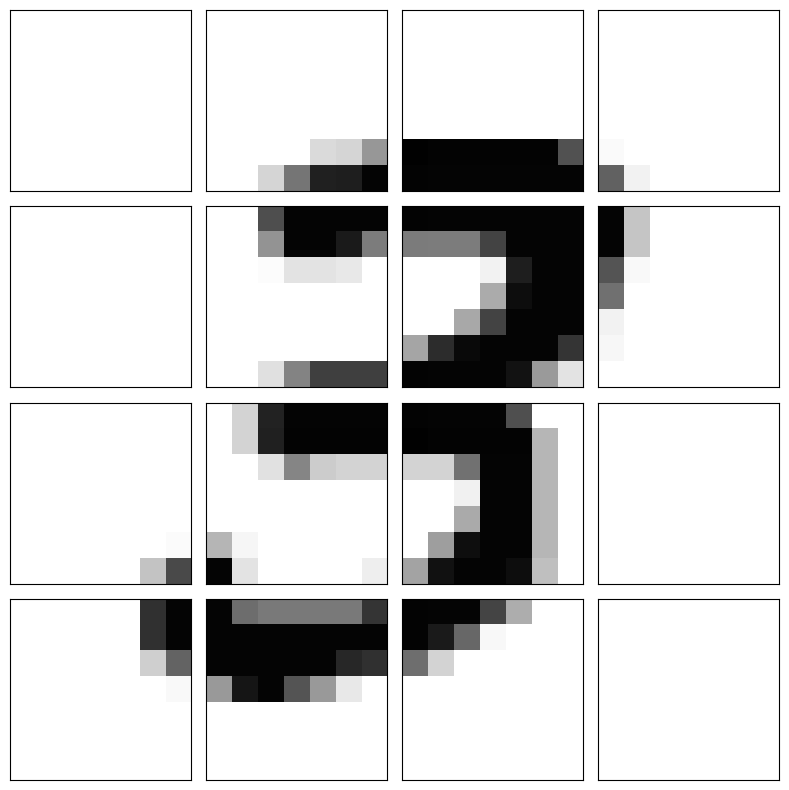

In [9]:
plt.figure(figsize=(8, 8))
ploti = 0
for patch in patches:
    ploti += 1
    plt.subplot(4, 4, ploti)
    draw_image(patch, '')
plt.tight_layout()

Shift by 2 columns and 2 rows to get ovelap patches

In [10]:
patches = []
for row in range(0, 28, 2):
    for col in range(0, 28, 2):
        patches.append(three[row:row + 7, col:col + 7])
len(patches)

196

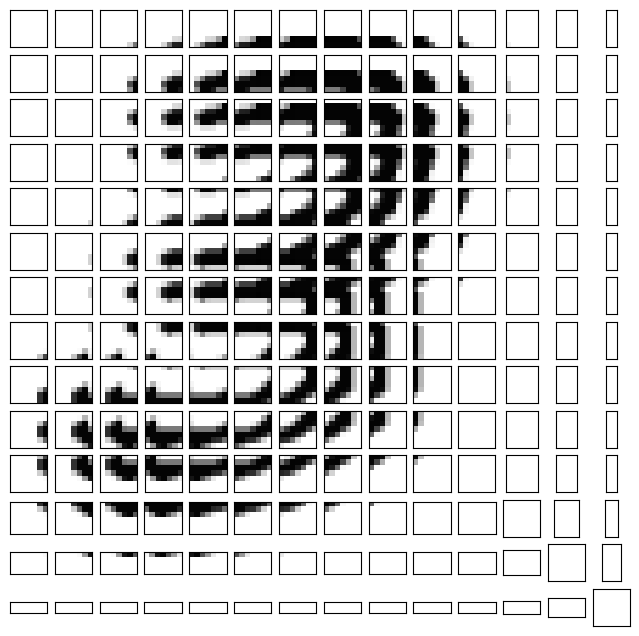

In [11]:
n_plot_rows = int(np.sqrt(len(patches)))
plt.figure(figsize=(8, 8))
ploti = 0
for patch in patches:
    ploti += 1
    plt.subplot(n_plot_rows, n_plot_rows, ploti)
    draw_image(patch, '')

In [12]:
patches = []
for row in range(0, 28, 2):
    for col in range(0, 28, 2):
        if row + 7 < 28 and col + 7 < 28:
            patches.append(three[row:row + 7, col:col + 7])
len(patches)

121

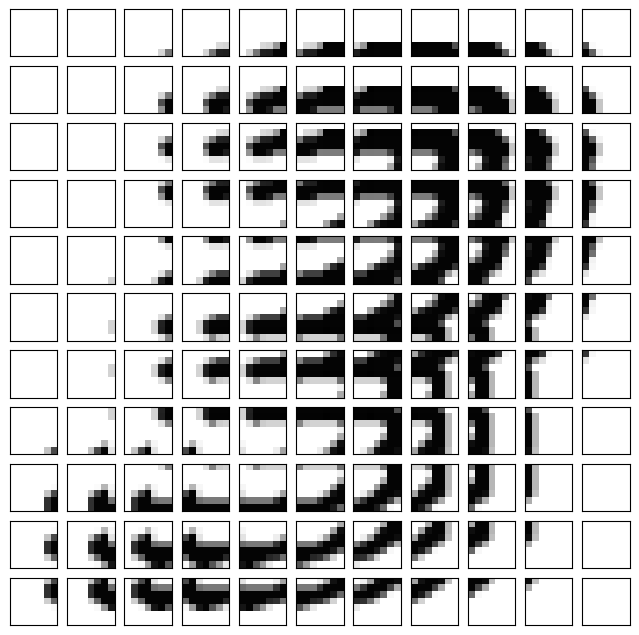

In [13]:
n_plot_rows = int(np.sqrt(len(patches)))
plt.figure(figsize=(8, 8))
ploti = 0
for patch in patches:
    ploti += 1
    plt.subplot(n_plot_rows, n_plot_rows, ploti)
    draw_image(patch, '')

### Weight matrix as kernel of filter

In [14]:
weights = np.array([[-1, -1, -1, -1, -1, -1, -1],
                    [-1, -1, -1, -1, -1, -1,  1],
                    [-1, -1, -1, -1, -1,  1,  1],
                    [-1, -1, -1, -1,  1,  1,  1],
                    [-1, -1, -1,  1,  1,  1,  1],
                    [-1, -1,  1,  1,  1,  1,  1],
                    [-1,  1,  1,  1,  1,  1,  1]])
weights

array([[-1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1],
       [-1, -1, -1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1],
       [-1, -1, -1,  1,  1,  1,  1],
       [-1, -1,  1,  1,  1,  1,  1],
       [-1,  1,  1,  1,  1,  1,  1]])

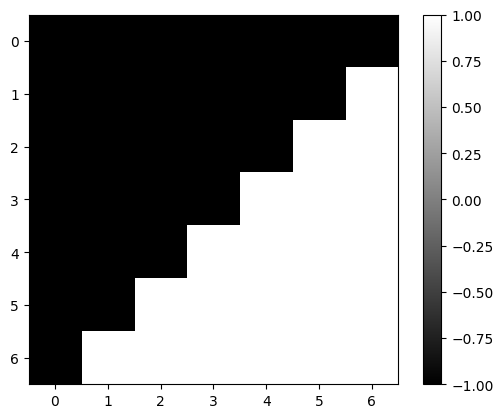

In [15]:
plt.imshow(weights, cmap='gray')
plt.colorbar();

### We make another filter by flipping the first one over rows

In [16]:
weights_flipped = np.flipud(weights)
print(weights_flipped)

[[-1  1  1  1  1  1  1]
 [-1 -1  1  1  1  1  1]
 [-1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1  1  1  1]
 [-1 -1 -1 -1 -1  1  1]
 [-1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1 -1 -1 -1 -1]]


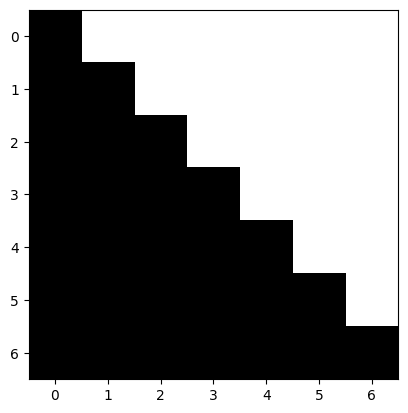

In [17]:
plt.imshow(weights_flipped, cmap='gray');

#### Apply the filter to all patches

In [20]:
new_image = []
for patch in patches:
    new_image.append( np.sum(patch * weights) )
new_image = np.array(new_image)
new_image

array([  0.        ,   0.        ,   0.7109375 ,   2.78515625,
         6.1640625 ,   8.55859375,   9.3984375 ,   7.56640625,
         4.328125  ,   0.3828125 ,  -1.015625  ,   0.        ,
         0.        ,   3.80078125,   9.7265625 ,  13.00390625,
         9.80859375,   7.33203125,   6.828125  ,   3.02734375,
        -2.53125   ,  -3.8671875 ,   0.        ,   0.        ,
         3.9296875 ,   6.953125  ,   1.87890625,  -5.94140625,
        -4.44921875,  -0.90625   ,  -2.390625  , -10.3515625 ,
        -8.80859375,   0.        ,   0.        ,   1.1171875 ,
        -3.37109375, -10.13671875, -11.8671875 ,  -4.65234375,
         2.14453125,  -8.50390625, -17.91015625, -11.0859375 ,
         0.        ,   0.17578125,   1.328125  ,   2.67578125,
         4.921875  ,   5.38671875,  10.796875  ,   2.0703125 ,
       -14.62890625, -18.84765625,  -7.41015625,   0.        ,
         0.3515625 ,   5.27734375,  10.50390625,   8.62109375,
         6.91796875,   4.390625  ,  -7.3515625 , -17.42

In [21]:
new_image.shape

(121,)

In [22]:
new_image_dim = int(np.sqrt(len(new_image)))
new_image_dim

11

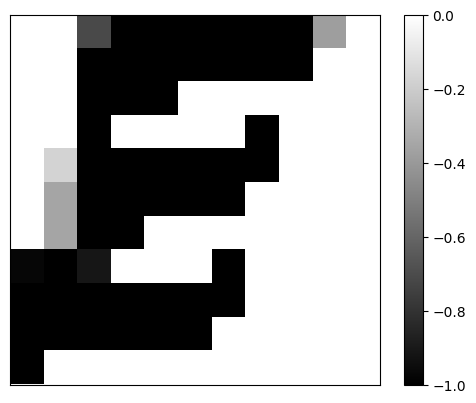

In [23]:
new_image = new_image.reshape(new_image_dim, new_image_dim)
draw_image(new_image, '')
plt.colorbar();

In [24]:
new_image = []
for patch in patches:
    new_image.append(np.sum(patch * weights_flipped) )
new_image = np.array(new_image)
new_image

array([  0.        ,   0.        ,  -0.7109375 ,  -2.44921875,
        -4.171875  ,  -7.96484375, -10.34375   , -12.15234375,
       -10.25      ,  -6.3046875 ,  -2.359375  ,   0.        ,
         0.        ,  -0.41015625,  -3.609375  ,  -7.04296875,
        -9.91796875, -12.06640625, -14.4296875 , -18.59765625,
       -14.640625  ,  -6.7578125 ,   0.        ,   0.        ,
         3.8984375 ,   5.3671875 ,   2.44140625,   0.87109375,
         2.67578125,  -2.8515625 , -11.703125  , -18.4609375 ,
        -9.98828125,   0.        ,   0.        ,   3.9296875 ,
         9.71484375,   9.67578125,   5.1875    ,   6.71484375,
         5.52734375,  -4.99609375, -12.63671875,  -9.3515625 ,
         0.        ,  -0.17578125,  -0.125     ,  -0.98046875,
        -2.8671875 ,  -6.01953125,  -4.21875   ,   0.1015625 ,
        -3.62109375,  -8.27734375,  -4.92578125,   0.        ,
         0.3515625 ,   1.62890625,  -1.19921875,  -5.86328125,
        -7.13671875,  -5.2421875 ,  -6.6484375 ,  -7.29

In [25]:
new_image_dim = int(np.sqrt(len(new_image)))
new_image_dim


11

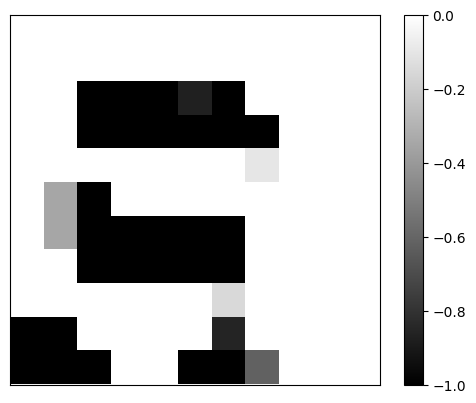

In [26]:
new_image = new_image.reshape(new_image_dim, new_image_dim)
draw_image(new_image, '')
plt.colorbar();